## Titanic: O maior naufrágio da história

O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável". A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com mais de 2 200 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história.

### Análise de Dados Titanic Board

O presente projeto tem como objetivo fazer uma análise exploratória do conjunto de dados 'titanic-data-6.csv', trazendo importantes informações que possam sanar algumas dúvidas sobre a ocorrência do naufrágio do maior transatlântico do mundo, ocorrido em 14 de abril de 1912, o grande Titanic.

### Questionamentos a serem analisados e respondidos 

* Qual a idade minima e máxima dos passageiros a bordo do návio, e qual a mais frequente?
* Qual o percentual de sobreviventes do naufrágio?
* O número de sobreviventes foi maior entre os homens ou as mulheres?

### Importação das Bibliotecas a serem utilizadas

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando o conjundo de dados


In [2]:
df = pd.read_csv('titanic-data-6.csv')


### Dicionário dos Dados

* Survived (Sobreviveu): 0 = Não, 1 = Sim 
* Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º 
* Sex (Sexo): Sexo do passageiro 
* Age (Idade): Idade em 
* Sibsp: Quantidade de irmãos / cônjuges a bordo do 
* Parch: Quantidade de pais / crianças a bordo do 
* Ticket (Bilhete): Número do bilhete de 
* Fare (Tarifa): Tarifa paga pelo Passageiro 
* Cabin (Cabine): Número de 
* Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton) 




#### Antes de dar inicio, vamos lembrar um ponto importante?

Você vai observar que a idade do passageiro não é um número inteiro e isso é proposital. Passageiros que possuíam menos de um ano de vida tinham suas idades apresentadas em números decimais de acordo com os meses de vida, então não realizaremos alteração deste dado da tabela.




### Conhecendo o tamanho do dataset

In [3]:
print('N. linhas:', df.shape[0])
print('N. colunas:', df.shape[1])
df.head()

N. linhas: 891
N. colunas: 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Levando em conta que o navio possui um total de mais de 1.500 passageiros, podemos considerar, através da contagem das linhas - que nosso arquivo não possui os dados de todos os passageiros que estavam a bordo. Nosso arquivo ainda possui algumas sujeiras, ou seja, dados que não serão utilizados em nossa análise, portando faremos uma limpeza a seguir das colunas "Ticket", "Cabin" e "PassagerID". 

### Vamos iniciar a limpeza dos dados para facilitar a visualização e eliminar sujeiras

In [4]:
df.drop(['Ticket','Cabin','PassengerId'], axis=1, inplace = True)


#### Dados dos 5 primeiros passageiros

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#### Dados dos 5 últimos passageiros 

In [6]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q


### Renomeando informações:

<b>Renomeando as colunas</b> remanescentes que estavam em inglês agora ficarão em português, isso facilitará ainda mais a leitura e a compreensão.

In [7]:
df.columns = ['Sobreviveu?','Classe','Nome','Sexo','Idade','Irmãos/Cônjuge','Pais/Crianças','Tarifa','Embarque']
df.head()

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


<b>Renomeando o conteúdo da coluna Sexo para facilitar a leitura</b>

In [8]:
df['Sexo'] = df['Sexo'].map({'female': '1-Mulher',
                             'male': '2-Homem'})

<b>Conhecendo os tipos de dados</b>:
O comando a seguir irá nos mostrar como nossos dados estão sendo tratados pela linguagem.

In [9]:
df.dtypes

Sobreviveu?         int64
Classe              int64
Nome               object
Sexo               object
Idade             float64
Irmãos/Cônjuge      int64
Pais/Crianças       int64
Tarifa            float64
Embarque           object
dtype: object

## Vamos aos questionamentos a serem respondidos!
### 1. Qual a idade minima e máxima dos passageiros a bordo do návio, e qual a mais frequente?


Text(0,0.5,'Frequência')

<Figure size 432x288 with 0 Axes>

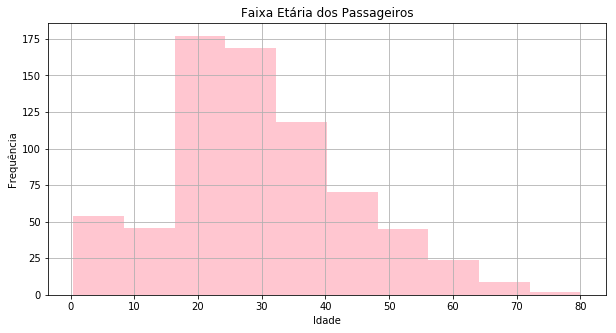

In [10]:
plt.figure();
df.hist(column='Idade', color=('pink'), alpha=0.9, bins=10, figsize=(10,5))
plt.title('Faixa Etária dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')

Através desta análise é possivel observar que existiam passageiros com idade inferior a 1 ano de idade e que os passageiros mais velhos possuiam até 80 anos e que a maior parte dos passageiros eram jovens e adultos que tinham entre 20 e 30 anos.

### 2. Qual o percentual de sobreviventes do naufrágio?

In [11]:
df['Nao Sobreviveu'] = df['Sobreviveu?'].map({0:1,1:0})

In [12]:
print('Sobreviventes     :', df['Sobreviveu?'].value_counts()[1])
print('Não Sobreviventes :', df['Sobreviveu?'].value_counts()[0])

Sobreviventes     : 342
Não Sobreviventes : 549


Text(0,0.5,'')

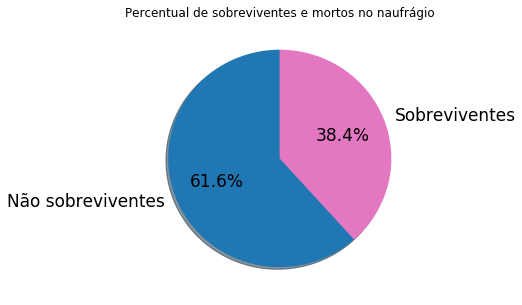

In [23]:
df['Sobreviveu?'].value_counts().plot.pie(colors=('tab:blue', 'tab:pink'), 
                                       title='Percentual de sobreviventes e mortos no naufrágio', 
                                       fontsize=17, shadow=True, startangle=90,autopct='%1.1f%%',
                                       labels=('Não sobreviventes','Sobreviventes'),
                                       figsize=(5,5)).set_ylabel('')

Através desta análise podemos observar que apenas 342 pessoas sobreviveram, o que representa 38,4% do total e que o número de mortos foi sifnificativamente maior, totalizando 549 mortos, ou seja 61,6% das pessoas não conseguiram salvar suas vidas.

### 3. O número de sobreviventes foi maior entre os homens ou as mulheres?

Text(0,0.5,'Quantidade')

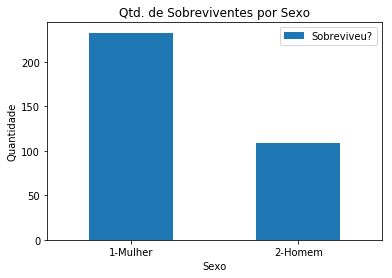

In [26]:
df.pivot_table(index='Sexo',  values=('Sobreviveu?'), aggfunc=np.sum)[['Sobreviveu?']].plot(
    kind='bar', rot=0, label=('Homem','Mulher'),
    color=('tab:blue'), stacked=True,
    title='Qtd. de Sobreviventes por Sexo').set_xlabel('Sexo')
plt.ylabel('Quantidade')

In [27]:
df.groupby(['Sexo']).sum()[['Sobreviveu?']]

,Sobreviveu?
Sexo,
1-Mulher,233
2-Homem,109


Diante dos números apresentados, podemos observar que a quantidade de mulheres sobreviventes supera a quantidade de homens.

## Conclusão

O Titanic possui uma triste história que mesmo após muitos anos de sua ocorrência, ainda mexe com o imaginário e com a emoção das pessoas, é considerado uma das maiores tragédias que a humanidade já viu e ouviu. Várias reflexões ainda são feitas através disso, como o questionamento quanto às nossas fragilidades e que mesmo os grandes e poderosos estão sujeitos a fatalidades como essa. 

Esse estudo propôs responder algumas perguntas que permeiam o imaginágio das pessoas e que são até considerados como curiosidades a respeito do assunto. Através dos mesmo podemos entender um pouco da proporção que teve esse acidente. Espero de alguma forma ter contribuído com as pessoas através desta análise. 


## Fontes

https://paulovasconcellos.com.br/como-criar-seu-primeiro-projeto-de-data-science-parte-2-de-2-cb9a2fe05eff

https://paulovasconcellos.com.br/como-criar-seu-primeiro-projeto-de-data-science-parte-1-de-2-d846c4c8d314

https://pt.wikipedia.org/wiki/RMS_Titanic
